In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
df = pd.read_csv('Preprocessed_Data_2014.csv') 

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# the last two rows are invalid
df.tail()

,numtl30dpd,inqlast6mths,accnowdelinq,numactvrevtl,totalcutl,installment,revolutil,delinqamnt,mthssincercntil,term,...,mosinoldrevtlop,avgcurbal,secappmortacc,emptitle,mthssincelastdelinq,dti,emplength,totcurbal,issued,loanstatus
235626,0.0,2.0,0.0,2.0,NaN,514.34,51.1%,0.0,NaN,60 months,...,93.0,4089.0,NaN,patrol,65.0,25.65,7 years,73598.0,Jan-2014,Current
235627,0.0,1.0,0.0,3.0,NaN,62.59,21.5%,0.0,NaN,36 months,...,130.0,28172.0,NaN,Server Engineer Lead,13.0,5.39,3 years,591610.0,Jan-2014,Fully Paid
235628,0.0,0.0,0.0,2.0,NaN,367.58,70.8%,0.0,NaN,36 months,...,166.0,11495.0,NaN,NaN,9.0,22.78,10+ years,57477.0,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Data columns (total 105 columns):
numtl30dpd                       235629 non-null float64
inqlast6mths                     235629 non-null float64
accnowdelinq                     235629 non-null float64
numactvrevtl                     235629 non-null float64
totalcutl                        0 non-null float64
installment                      235629 non-null float64
revolutil                        235504 non-null object
delinqamnt                       235629 non-null float64
mthssincercntil                  0 non-null float64
term                             235629 non-null object
earliestcrline                   235629 non-null object
openacc                          235629 non-null float64
numbcsats                        235629 non-null float64
totalbalil                       0 non-null float64
bcopentobuy                      233184 non-null float64
fundedamnt                       235629 non-null fl

In [7]:
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in df.columns:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)

In [8]:
print(len(num_feature), len(ob_feature))
print(len(all_null_feature))

56 20
29


In [9]:
all_null_feature

['totalcutl',
 'mthssincercntil',
 'totalbalil',
 'secappcollections12mthsexmed',
 'secappmthssincelastmajorderog',
 'allutil',
 'secappopenactil',
 'openactil',
 'maxbalbc',
 'openrv12m',
 'secappnumrevaccts',
 'secappinqlast6mths',
 'secappopenacc',
 'secappchargeoffwithin12mths',
 'verificationstatusjoint',
 'openil24m',
 'openil12m',
 'ilutil',
 'inqlast12m',
 'revolbaljoint',
 'inqfi',
 'openrv24m',
 'openacc6m',
 'secapprevolutil',
 'secappearliestcrline',
 'dtijoint',
 'memberid',
 'annualincjoint',
 'secappmortacc']

In [10]:
ob_feature

['revolutil',
 'term',
 'earliestcrline',
 'id',
 'disbursementmethod',
 'zipcode',
 'homeownership',
 'addrstate',
 'desc',
 'intrate',
 'subgrade',
 'applicationtype',
 'initialliststatus',
 'verificationstatus',
 'grade',
 'purpose',
 'emptitle',
 'emplength',
 'issued',
 'loanstatus']

In [11]:
num_feature

['numtl30dpd',
 'inqlast6mths',
 'accnowdelinq',
 'numactvrevtl',
 'installment',
 'delinqamnt',
 'openacc',
 'numbcsats',
 'bcopentobuy',
 'fundedamnt',
 'numacctsever120pd',
 'numtl120dpd2m',
 'totalbalexmort',
 'totalilhighcreditlimit',
 'accopenpast24mths',
 'mthssincelastrecord',
 'numsats',
 'mthssincelastmajorderog',
 'tothicredlim',
 'chargeoffwithin12mths',
 'mosinrcnttl',
 'collections12mthsexmed',
 'pcttlnvrdlq',
 'mthssincerecentbc',
 'numtl90gdpd24m',
 'mthssincerecentrevoldelinq',
 'mosinrcntrevtlop',
 'revolbal',
 'bcutil',
 'totalrevhilim',
 'mthssincerecentinq',
 'mosinoldilacct',
 'numtloppast12m',
 'percentbcgt75',
 'mthssincerecentbcdlq',
 'numrevtlbalgt0',
 'totalacc',
 'numoprevtl',
 'numactvbctl',
 'mortacc',
 'delinq2yrs',
 'totcollamt',
 'numrevaccts',
 'annualinc',
 'taxliens',
 'totalbclimit',
 'loanamnt',
 'numiltl',
 'pubrecbankruptcies',
 'numbctl',
 'pubrec',
 'mosinoldrevtlop',
 'avgcurbal',
 'mthssincelastdelinq',
 'dti',
 'totcurbal']

In [67]:
for i,j in enumerate(ob_feature):
    print(i, j)

0 applicationtype
1 initialliststatus
2 revolutil
3 disbursementmethod
4 earliestcrline
5 subgrade
6 term
7 verificationstatus
8 emplength
9 grade
10 purpose
11 desc
12 homeownership
13 zipcode
14 intrate
15 id
16 emptitle
17 addrstate
18 issued
19 loanstatus


In [32]:
i = 1
feat = ob_feature[i]
print(feat)

initialliststatus


In [33]:
print(df[feat].isnull().sum())
df[feat].value_counts()

2


w    123473
f    112156
Name: initialliststatus, dtype: int64

In [34]:
i = 9
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

grade
2


C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64

In [35]:
i = 5
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

subgrade
2


C2    13965
C3    13794
C1    13498
B4    13475
B5    13309
C4    13093
B3    13075
C5    12215
B2    11439
D1    10880
A5    10761
B1    10637
D2     9544
A4     9124
D3     8487
D4     7881
D5     6200
A3     5842
E1     5589
A2     5234
A1     5147
E2     4831
E3     3902
E4     3101
E5     2698
F1     1935
F2     1355
F3     1321
F4      964
F5      648
G1      527
G2      427
G3      305
G4      214
G5      212
Name: subgrade, dtype: int64

In [36]:
# date format, convert to time difference, e.g., months to 2015 and thus is a numeric feature
i = 4
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

earliestcrline
2


Aug-2001    1980
Aug-2000    1945
Sep-2000    1719
Aug-2002    1711
Aug-1999    1696
Oct-2000    1658
Sep-1999    1642
Sep-2002    1574
Oct-2001    1574
Sep-2001    1562
Oct-1999    1543
Nov-1999    1525
Sep-1998    1505
Oct-2002    1472
Nov-2000    1468
Mar-2001    1452
Nov-2001    1440
Jul-2001    1421
Sep-2003    1415
Mar-2000    1399
Aug-2003    1389
May-2001    1384
Oct-1998    1371
Jul-2002    1370
Jun-2000    1366
Jun-2001    1356
Jul-2000    1351
Apr-2001    1347
Oct-2003    1327
Aug-1998    1312
            ... 
Dec-1956       1
Sep-1957       1
Mar-1962       1
Mar-1961       1
Sep-1963       1
Nov-1956       1
Mar-1959       1
Jul-1958       1
May-1950       1
Nov-1954       1
Aug-1961       1
Apr-1962       1
May-1963       1
Jan-1954       1
Oct-1958       1
Feb-1961       1
Jun-1949       1
Dec-1963       1
May-1958       1
Jan-1953       1
Feb-1963       1
Dec-1960       1
Jul-1961       1
Jan-1948       1
Aug-1946       1
Mar-1960       1
Aug-1962       1
Oct-1950      

In [38]:
# all "individual", that is the reason for all join-stuff are NA
i = 0
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

applicationtype
2


Individual    235629
Name: applicationtype, dtype: int64

In [40]:
i = 14
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

intrate
2


 12.99%    12630
 10.99%    10684
 15.61%    10310
 12.49%     9704
 13.98%     8856
 14.99%     8101
 17.57%     7686
 13.35%     7620
 11.67%     7255
 14.49%     7244
 11.99%     6199
 10.15%     6116
 16.99%     5946
  9.17%     5656
  8.39%     5575
 16.29%     5414
  6.03%     5146
  7.69%     4962
  6.49%     4026
 18.24%     3597
  9.67%     3455
  8.90%     3384
 18.99%     3214
  7.12%     3055
 14.64%     3029
 14.16%     2952
 19.52%     2926
  7.90%     2885
 15.31%     2838
 13.65%     2753
           ...  
 20.49%      983
 17.14%      974
 16.49%      968
 24.99%      963
 21.99%      916
 21.18%      858
  6.99%      855
 17.86%      765
 18.54%      720
 19.22%      663
 25.57%      647
 19.24%      588
 22.45%      558
 25.80%      526
 19.97%      517
 20.50%      470
 25.83%      426
 21.48%      332
 25.89%      305
 22.40%      276
 22.99%      240
 25.99%      214
 23.40%      214
 26.06%      212
 22.90%      212
 23.99%      179
 23.70%      163
  6.00%       

In [44]:
# only 235631 - 220352 = 15279 not null values, and involves NLP. simply drop it, or make it classify them to null and not_null, short v.s. long
# this part might be quite similar to the purpose feature, which is quite important.

i = 11
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

desc
220352


  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                                                                                                                                                                               11
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                                                                                                                                                                               10
  Borrower added on 02/19/

In [47]:
# only use 36 months data for our project

i = 6
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(df.term.value_counts(normalize=True))
df[feat].value_counts()

term
2
 36 months    0.689941
 60 months    0.310059
Name: term, dtype: float64


 36 months    162570
 60 months     73059
Name: term, dtype: int64

In [48]:
# one hot encoding, but ignore the 1 data point ANY?

i = 12
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

homeownership
2


MORTGAGE    119937
RENT         92684
OWN          23007
ANY              1
Name: homeownership, dtype: int64

In [53]:
# 49 states, can generate frequency and leave-one-out encoding

i = 17
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()))
df[feat].value_counts()

addrstate
2
49


CA    33288
NY    19923
TX    18967
FL    15691
IL     9628
NJ     8863
PA     8427
OH     8011
GA     7600
VA     6965
NC     6442
MI     6205
MD     5564
AZ     5507
MA     5232
WA     5118
CO     4929
MN     4276
IN     4206
TN     3907
MO     3788
CT     3483
NV     3225
WI     3101
AL     3034
SC     2971
OR     2912
LA     2761
KY     2379
OK     2118
KS     2103
AR     1806
UT     1669
NM     1367
WV     1311
MS     1197
HI     1196
NH     1155
RI     1043
MT      731
DE      661
DC      637
AK      598
WY      583
VT      542
SD      506
ME        1
ID        1
IA        1
Name: addrstate, dtype: int64

In [54]:
i = 2
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

revolutil
127


0%        590
59%       520
58%       515
53%       512
48%       485
50%       483
55%       479
57%       472
54%       472
46%       471
52%       467
61%       466
62%       466
47%       462
51%       457
60%       451
67%       450
65%       442
63%       441
49%       441
64%       438
40%       436
66%       429
56%       428
43%       428
68%       428
44%       423
69%       422
41%       421
45%       416
         ... 
180.3%      1
109.5%      1
118.9%      1
109.2%      1
153%        1
119.4%      1
177.7%      1
113.3%      1
107.5%      1
127%        1
116.1%      1
123%        1
152.7%      1
117.2%      1
106%        1
104%        1
119.8%      1
118.2%      1
106.7%      1
108.9%      1
141.8%      1
129.4%      1
892.3%      1
113.6%      1
116.8%      1
112.2%      1
123.9%      1
117.5%      1
111.9%      1
114.5%      1
Name: revolutil, Length: 1160, dtype: int64

In [55]:
i = 15
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

id
235629


Total amount funded in policy code 1: 3503840175    1
Total amount funded in policy code 2: 873652739     1
Name: id, dtype: int64

In [57]:
# only keep first 3 digits, 866 values, use frequency and leave on out encoding

i = 13
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
print(len(df[feat].value_counts()))
print(df[feat].value_counts()[:5])
df[feat].value_counts()[-5:]

zipcode
2
866
750xx    2546
945xx    2418
112xx    2382
606xx    2273
300xx    2085
Name: zipcode, dtype: int64


854xx    1
861xx    1
833xx    1
093xx    1
510xx    1
Name: zipcode, dtype: int64

In [58]:
i = 7
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

verificationstatus
2


Source Verified    97741
Not Verified       70659
Verified           67229
Name: verificationstatus, dtype: int64

In [59]:
# has 13238 NAs, can do frequency and simple NLP

i = 16
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

emptitle
13238


Teacher                                     4569
Manager                                     3772
Registered Nurse                            1960
RN                                          1816
Supervisor                                  1663
Owner                                       1512
Sales                                       1406
Project Manager                             1368
Office Manager                              1185
manager                                     1115
Driver                                      1111
General Manager                             1055
teacher                                     1028
Director                                    1000
Engineer                                     870
President                                    852
owner                                        850
Vice President                               827
driver                                       822
Attorney                                     708
Administrative Assis

In [60]:
# 12 values, n/a, <1 year, 1~9 year(s), 10+ years, convert to num

i = 8
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

emplength
12021


10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
8 years      11853
6 years      11821
9 years       9424
Name: emplength, dtype: int64

In [63]:
i = 10
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

purpose
2


debt_consolidation    143006
credit_card            55522
home_improvement       13045
other                  10371
major_purchase          3858
medical                 2331
small_business          2277
car                     1832
moving                  1328
vacation                1178
house                    750
renewable_energy         123
wedding                    8
Name: purpose, dtype: int64

In [64]:
i = 18
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

issued
2


Oct-2014    38783
Jul-2014    29306
Nov-2014    25054
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Sep-2014    10606
Dec-2014    10307
Name: issued, dtype: int64

In [65]:
i = 19
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

loanstatus
2


Fully Paid            172687
Charged Off            39220
Current                22321
Late (31-120 days)       744
In Grace Period          506
Late (16-30 days)        150
Default                    1
Name: loanstatus, dtype: int64

In [66]:
i = 3
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

disbursementmethod
2


Cash    235629
Name: disbursementmethod, dtype: int64

0 applicationtype
1 initialliststatus
2 revolutil
3 disbursementmethod
4 earliestcrline
5 subgrade
6 term
7 verificationstatus
8 emplength
9 grade
10 purpose
11 desc
12 homeownership
13 zipcode
14 intrate
15 id
16 emptitle
17 addrstate
18 issued
19 loanstatus


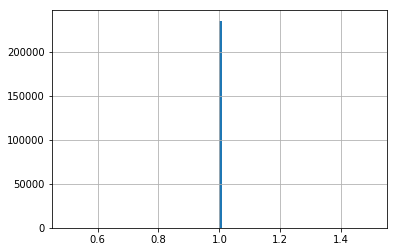

In [83]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float)
df.ratio.hist(bins=100)

In [81]:
df[['fundedamnt','loanamnt']][:10]

,chargeoffwithin12mths,applicationtype
0,15000.0,15000.0
1,10400.0,10400.0
2,12800.0,12800.0
3,21425.0,21425.0
4,7650.0,7650.0
5,9600.0,9600.0
6,17000.0,17000.0
7,21075.0,21075.0
8,12975.0,12975.0
9,5250.0,5250.0


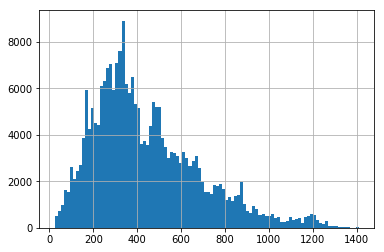

In [84]:
df.installment.hist(bins=100)

In [87]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [88]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', "grade", "subgrade", "openacc"]

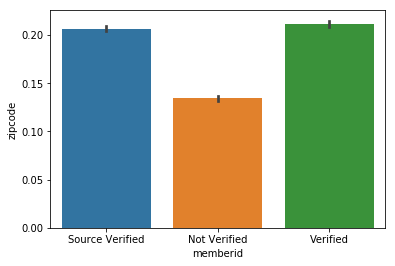

In [99]:
# why verified incomes gives higher default rates?

sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

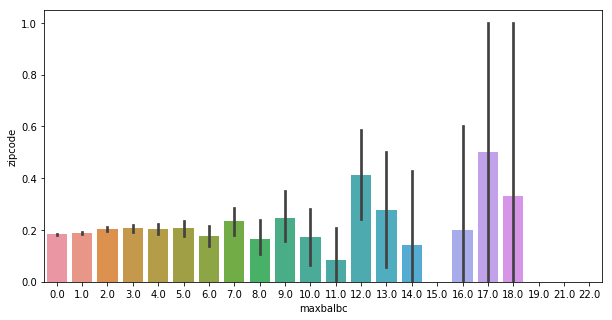

In [95]:
plt.subplots(figsize=(10,5))
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)

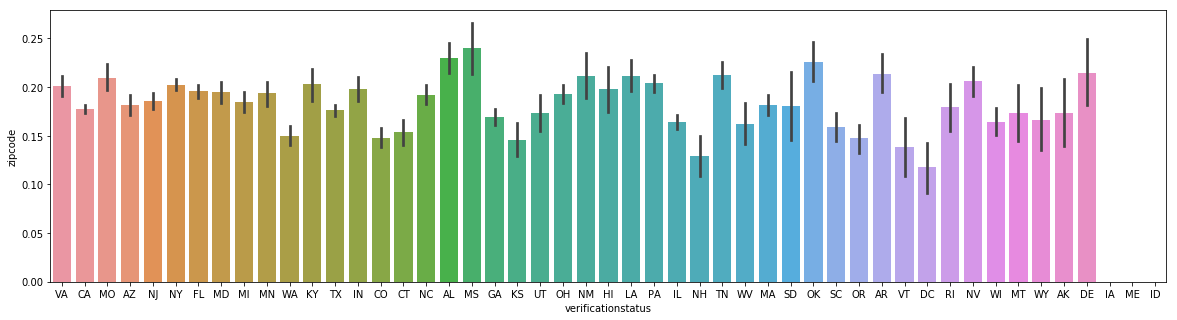

In [98]:
plt.subplots(figsize=(20,5))
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)

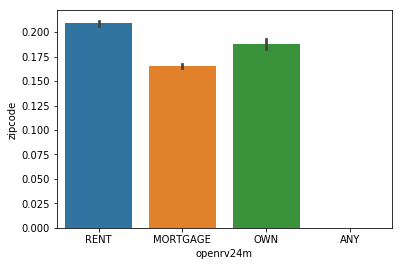

In [100]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)

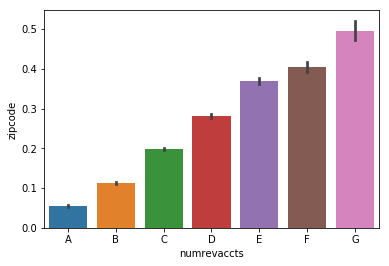

In [101]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [102]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

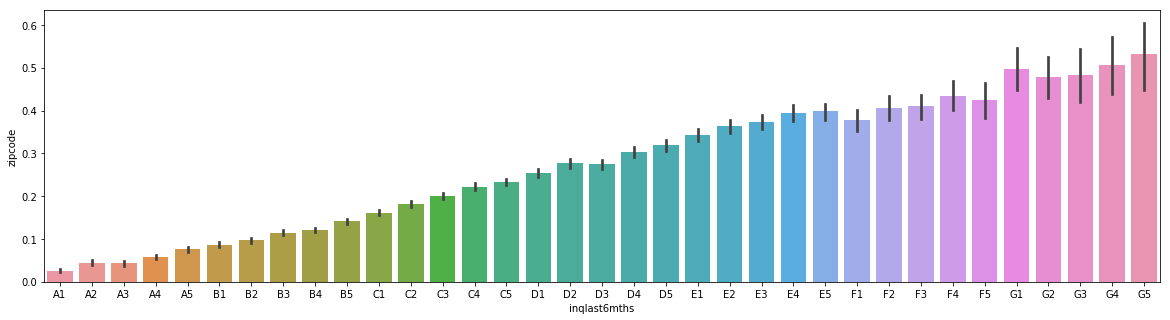

In [103]:
plt.subplots(figsize=(20,5))
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

In [110]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) # group the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() # get group size counts, hashed by the two variables
    table = table.unstack('loanstatus') # split the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) # divide the counts by the totals
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    normedtable.iloc[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
#     fig.savefig('age.png')

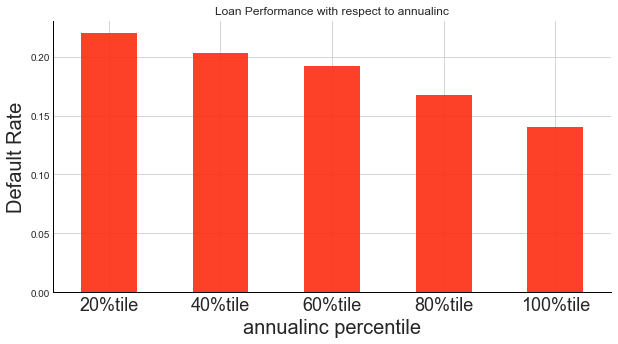

In [111]:
countinuous_variable_plot('annualinc')

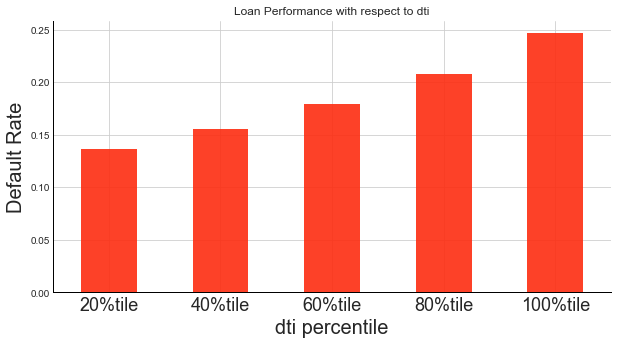

In [112]:
countinuous_variable_plot('dti')

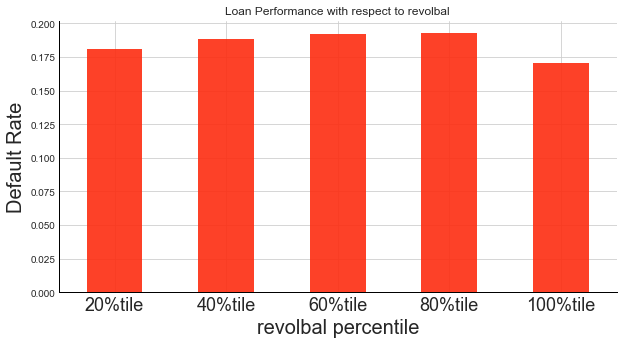

In [113]:
countinuous_variable_plot('revolbal')

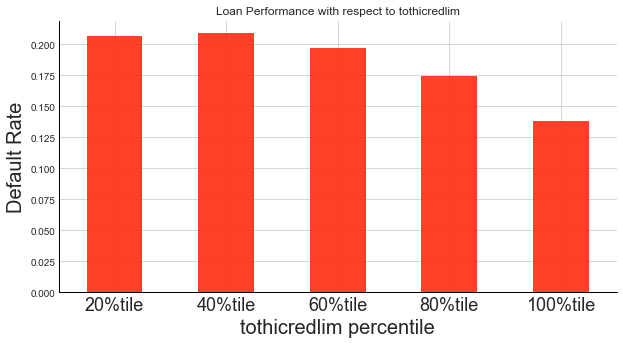

In [114]:
countinuous_variable_plot('tothicredlim')

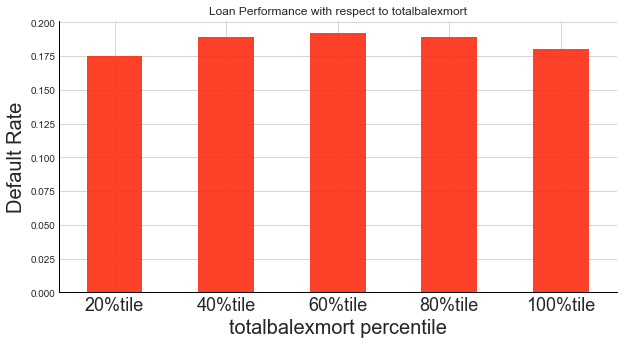

In [115]:
countinuous_variable_plot('totalbalexmort')

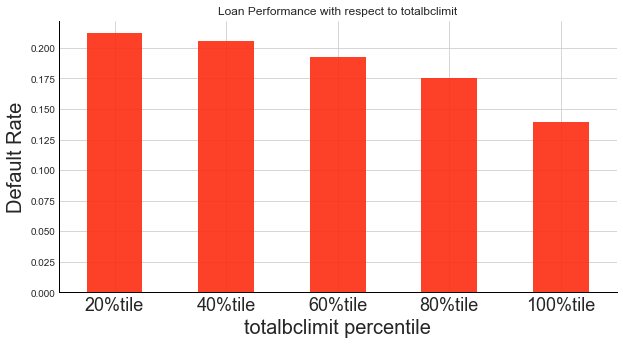

In [116]:
countinuous_variable_plot('totalbclimit')

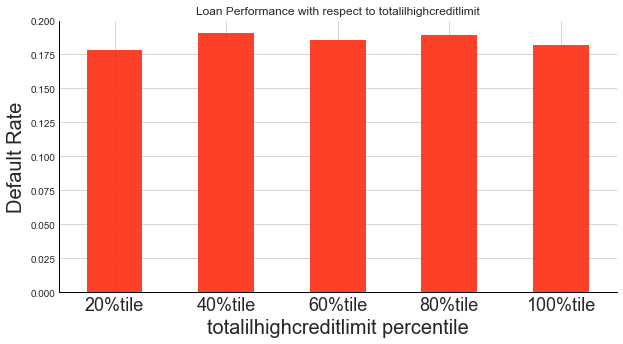

In [117]:
countinuous_variable_plot('totalilhighcreditlimit')